<h2 style='color:darkblue'>Introduction to Machine Learning</h2>

*-Ejelonu Benedict Ositadinma*

<h3> Ordinary least squares (OLS) regression </h3> 
This is a method that allows us to find a line that best describes the relationship between one or more predictor variables and a response variable .
This method allows us to find the following equation:

$ \hat{y} = b_0 + b_1 x $

where : 

$ \hat{y} = $ The estimated response value

$ b_0 = $ The intercept of the regression line

$ b_1 = $ The slope of the regression line

This equation can help us understand the relationship between the predictor and response variable, and it can be used to predict the value of a response variable given the value of the predictor variable.


In [1]:
# import the needed libraries for this demo;
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# create dictionary housing records
generated_dict = {
    'hours_studied' : [0.5,2,3,5,6.5,6.85,7.5,9],
    'exam_score' : [11,43,56,65,71,76, 81, 96]
}

# create dataframe
data = pd.DataFrame(generated_dict)

# display data;
data.head()

,hours_studied,exam_score
0,0.5,11
1,2.0,43
2,3.0,56
3,5.0,65
4,6.5,71


In [3]:
# define x and y variable :

x = data['hours_studied']
y = data['exam_score']

In [4]:
x = sm.add_constant(x) #adding constants to x

In [5]:
x

,const,hours_studied
0,1.0,0.50
1,1.0,2.00
2,1.0,3.00
3,1.0,5.00
4,1.0,6.50
5,1.0,6.85
6,1.0,7.50
7,1.0,9.00


In [6]:
### Modelling ;

model = sm.OLS(y, x).fit()

print(model.params)
# view model summary ;
print(model.summary())

const            19.384971
hours_studied     8.523426
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     74.70
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           0.000132
Time:                        09:34:33   Log-Likelihood:                -26.543
No. Observations:                   8   AIC:                             57.09
Df Residuals:                       6   BIC:                             57.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [7]:
### visualize the line of best of fit;

def visualize_ols(x_col , y_col):

    """
    x_col = column in df baring the independent var 
    y_col = column in df baring the dependent var or var to be predicted 

    usage:
        visualize(df['hours_studied'],data['exam_score'])
    """

    a, b = np.polyfit(x_col, y_col, 1)
    plt.scatter(x_col, y_col, color='purple')
    plt.plot(x_col, a*x_col+b)

    plt.text(1,80, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')


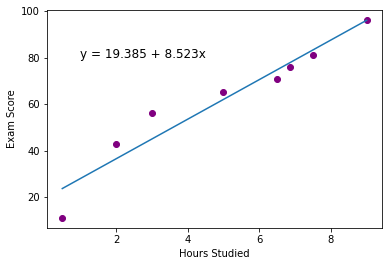

In [8]:
visualize_ols(data['hours_studied'], data['exam_score'])

In [9]:
def predictor(hour_val,x_col=data['hours_studied'],y_col=data['exam_score']):
    
    '''
    This takes in an hour value and using the regression line just obtained,
    outputs an exam score.
    '''

    a, b = np.polyfit(x_col, y_col, 1)
    plt.scatter(x_col, y_col, color='purple')
    plt.plot(x_col, a*x_col+b)

    predicted_val = a*hour_val+b

    plt.scatter(hour_val,predicted_val, color='k')
    plt.axhline(predicted_val, color = 'r', ls = '--')
    plt.axvline(hour_val, color = 'r', ls = '--')

    plt.text(1,80, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

    plt.xlabel('Hours Studied')
    plt.ylabel('Exam Score')

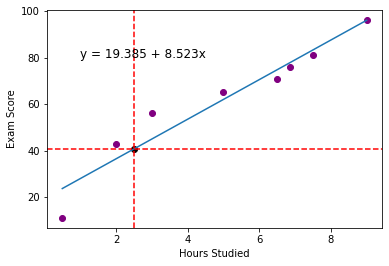

In [10]:
predictor(2.5)